# TW1 


## Exploratory Data Analysis

- See the examples of basic visualization and Pandas on Canvas. 

### Write full names of your team members here

<span style="color:red">Xiaomei Xie</span>
<br>
<span style="color:red">Lili Hao</span>



## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [75]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [76]:
# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [77]:
#display all data. You can uncomment the code in the next line

display(data)

data.shape

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9
...,...,...,...,...
9/22/19,38.2,3.7,13.8,7.6
9/23/19,94.2,4.9,8.1,9.7
9/24/19,177.0,9.3,6.4,12.8
9/25/19,283.6,42.0,66.2,25.5


(200, 4)

## Part 1 Tasks

Create cells to solve each of the following problems. Check the example Python codes for data visualization (TW1 on Canvas). 

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value? 

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b). 

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph. 

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r. 

(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph. 


### (1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value?  

In [78]:
data.mean()


TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

In [79]:
data.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

In [80]:
data['TV'].mode()

0     17.2
1     76.4
2    109.8
3    177.0
4    184.9
5    197.6
6    199.8
7    222.4
8    237.4
9    240.1
dtype: float64

In [81]:
data['Radio'].mode()

0    4.1
1    5.7
dtype: float64

In [82]:
data['Newspaper'].mode()

0     8.7
1     9.3
2    25.6
dtype: float64

In [83]:
data['Sales'].mode()

0    9.7
dtype: float64

### (2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

In [84]:
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### (3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b).

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

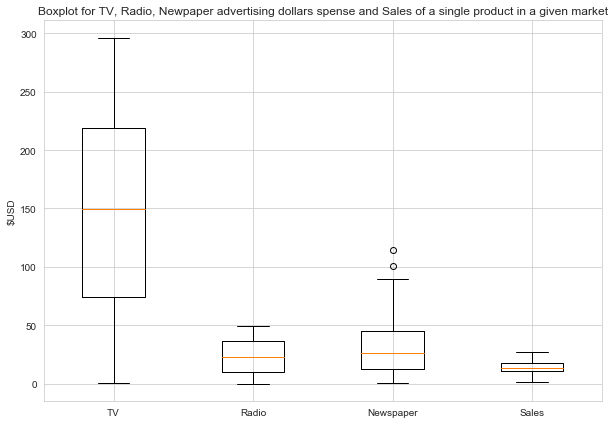

In [86]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.set_title('Boxplot for TV, Radio, Newpaper advertising dollars spense and Sales of a single product in a given market')  

ax.boxplot([data['TV'],data['Radio'], data['Newspaper'],data['Sales'], ])
ax.set_xticklabels(['TV', 'Radio', 'Newspaper','Sales'])
ax.set_ylabel('$USD')
plt.show()

### (4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.) 

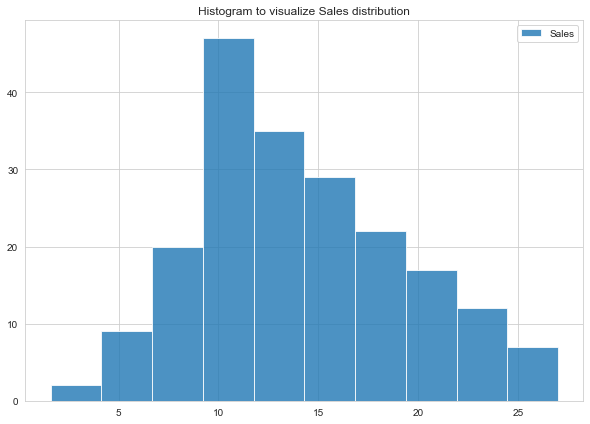

In [87]:
fig = plt.figure(figsize =(10, 7)) 
plt.title('Histogram to visualize Sales distribution')
plt.hist(data['Sales'],bins=10,label='Sales',alpha=0.8)

plt.legend(loc='best')

ax.set_xlabel("Sales")
ax.set_ylabel("# of observations")

plt.show()

### <span style="color:red">Visualize distribution of the data for sales using histogram</span>
### <span style="color:red"> The pattern is the bell-shaped curve known as the "normal distribution." It is unimodal</span>

### (5) For Sales, visualize the trend of the data over time using a graph. 

In [88]:
data.index=pd.to_datetime(data.index)

salesMean = data['Sales'].mean()

In [89]:
import warnings
warnings.filterwarnings('ignore')

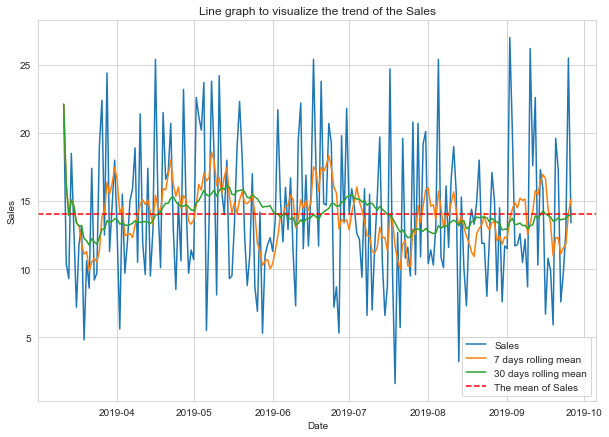

In [90]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.set_title('Line graph to visualize the trend of the Sales')
ax.plot(data.index, data['Sales'], label='Sales')
ax.plot(data.index, data["Sales"].rolling(window='7D').mean(),label='7 days rolling mean')
ax.plot(data.index, data["Sales"].rolling(window='30D').mean(), label='30 days rolling mean')
ax.axhline(y=data['Sales'].mean(), xmin=0, c='r',linestyle='--',label='The mean of Sales')

ax.set_xlabel("Date")
ax.set_ylabel("Sales")
ax.legend(loc='best')

### (6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r. 

In [91]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [92]:
print(data["TV"].corr(data["Sales"]))
print(data["Radio"].corr(data["Sales"]))
print(data["Newspaper"].corr(data["Sales"]))

0.7822244248616061
0.5762225745710551
0.22829902637616528


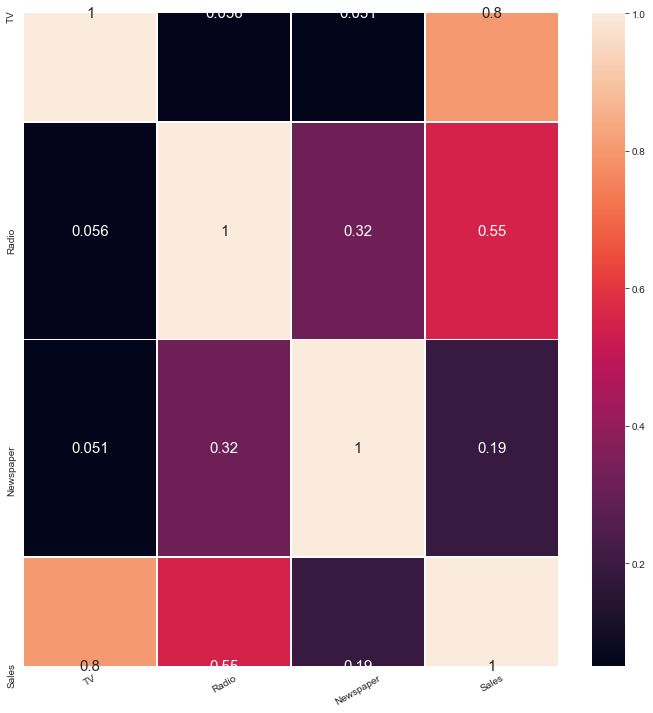

In [93]:
fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data.corr(method = 'spearman'),annot=True, linewidths=0.4,annot_kws={'size':15},ax=ax,cbar=True)
plt.xticks(rotation=30, size=10)
plt.show()

### (7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.  

In [94]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Newspaper plotted against Sales')

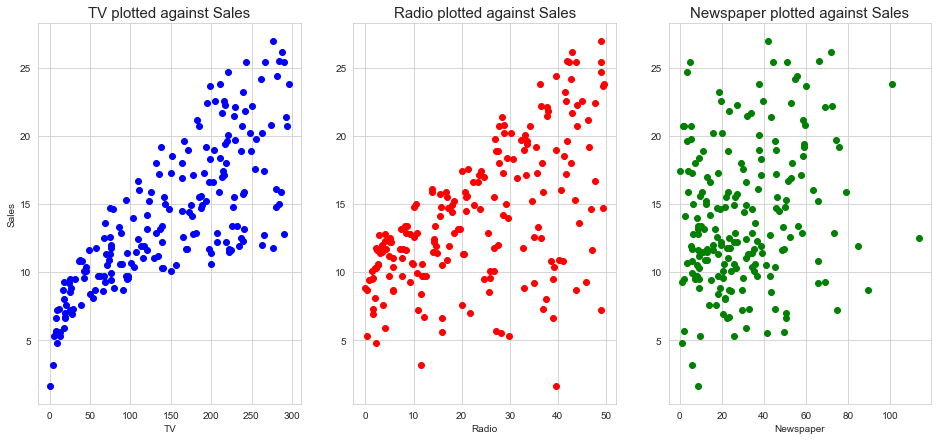

In [95]:
plt.figure(figsize=(16,7))

tv = data['TV']
radio = data['Radio']
newspaper= data['Newspaper']

x = data['Sales']

plt.subplot(1,3,1)
# Creating scatter 
 
plt.scatter(tv,x,c='b',marker='o')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title('TV plotted against Sales',fontsize=15)

plt.subplot(1,3,2)
plt.scatter(radio,x, c='r',marker='o')
plt.xlabel("Radio")
plt.title('Radio plotted against Sales',fontsize=15)

plt.subplot(1,3,3)
plt.scatter(newspaper,x, c='g',marker='o')
plt.xlabel("Newspaper")
plt.title('Newspaper plotted against Sales',fontsize=15)


## Part 2 Write a summary of what you find from the data

### Please check the attachement of document in the submmition. 
* The Boxplot for TV, Radio, Newpaper advertising dollars expense and Sales of a single product in a given market shows 
     * the median, .25 percentile, .75 percentile, min and max match what we calculate before. 
     * Newpaper has two outlier which is larger than what we expect for 99% data in Gussian or normal distribution 
* The Sales distribution histogram shows a unimodel distribution. The most frequent sales of a single product in a given market (in thousands of items) happens around 10
* The Sales trend visualization shows a seasonality change throughout the year: the sale is relatively higher in the month of May, July, and September. Also the graph fluctuates less as time goes on.
* For each pair of Pearson's correlation coefficiente the TV-Sales = 0.7822244248616061, Radio-Sales=0.5762225745710551, Newpaper-Sales0.22829902637616528. So, TV has the highest correlation with Sales, and Newpaper has weakest correlation with Sales among these comparison'

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html